In [7]:
# Decision Tree Classifier

# Librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

# Dataset
dataset = pd.read_csv('D:\Personal\Maestria BigData\Módulo 7. Data mining, machine learning y deep learning\Datos\Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values # Elige edad y salario estimado
y = dataset.iloc[:, 4].values # Valor Purchased
print(X)
print(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

# Feature Scaling -> No hace falta, ya que no se basa en distancias Euclideas
# pero se puede utilizar para agilizar los cálculos
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
print(X_train)
X_test = sc.transform(X_test) 
print(X_test)

# Entrenamiento del modelo
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', # criterio usado
                                    max_leaf_nodes = None, # si se quiere definir un maximo de hojas por nodo
                                    min_samples_split = 2, # numero minimo de datos para hacer un split
                                    max_features = None, # si se quiere definir un limite de features usadas
                                    random_state = 0)
classifier.fit(X_train, y_train)

# Prediccion
y_pred = classifier.predict(X_test)
print(y_pred)

# Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

array([[70,  9],
       [ 4, 37]], dtype=int64)

<ipython-input-5-178b93a5ad5d>:21: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


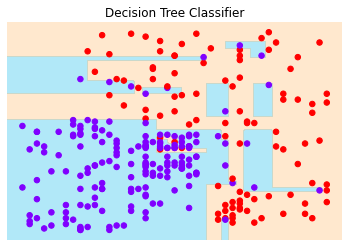

<ipython-input-5-178b93a5ad5d>:21: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


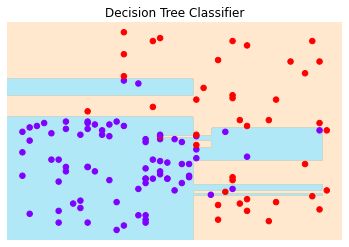

In [5]:
### Visualización
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    
    plt.title('Decision Tree Classifier')
    plt.show()
    
# Train
visualize_classifier(classifier, X_train, y_train)

# Test
visualize_classifier(classifier, X_test, y_test)